In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,f1_score,accuracy_score
# from scipy.interpolate import spline


In [2]:
data=pd.read_csv("log.csv")

In [3]:
data.head(20)

,Temperature,Pressure,Humidity
0,24.46,989.15,56
1,24.46,989.16,56
2,24.46,989.07,56
3,24.48,989.10,56
4,24.48,989.11,56
5,24.49,989.18,56
6,24.51,989.20,56
7,24.49,989.11,56
8,24.49,989.11,56
9,24.49,989.15,56


In [4]:
data.describe()

,Temperature,Pressure,Humidity
count,103.000000,103.000000,103.000000
mean,24.462816,989.169903,55.970874
std,0.086766,0.044048,0.168983
min,24.190000,989.060000,55.000000
25%,24.480000,989.140000,56.000000
50%,24.500000,989.170000,56.000000
75%,24.510000,989.200000,56.000000
max,24.540000,989.280000,56.000000


In [9]:
df2=data.iloc[:,2]
df1=data.iloc[:,1]
df0=data.iloc[:,0]

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

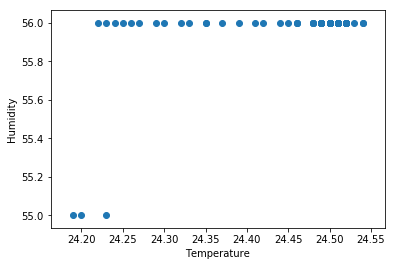

In [10]:
plt.scatter(data['Temperature'],data['Humidity'])
# plt.scatter(df2,df1)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.plot


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

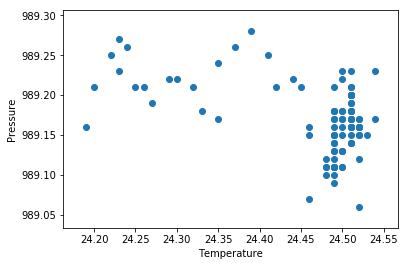

In [11]:
plt.scatter(data['Temperature'],data['Pressure'])
# plt.scatter(df2,df1)
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.plot


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib

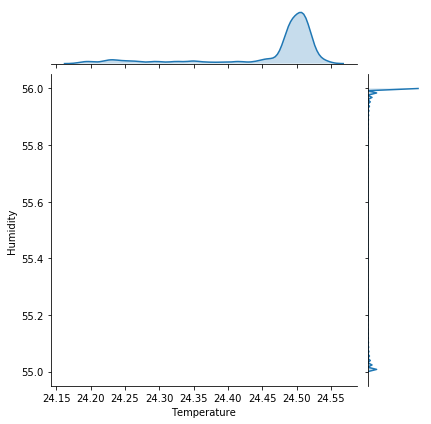

In [12]:
sns.jointplot(x=df0, y=df2,kind="kde")

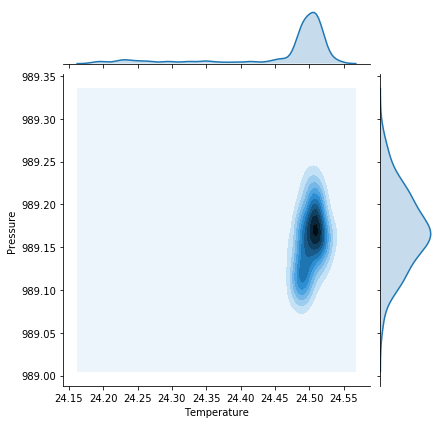

In [13]:
sns.jointplot(x=df0, y=df1,kind="kde")

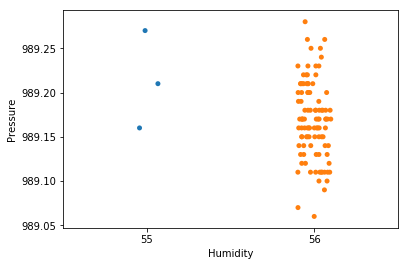

In [14]:
sns.stripplot(x=df2, y=df1, data=data, jitter=True)

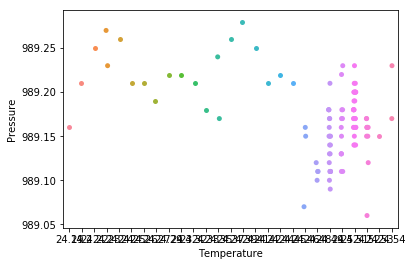

In [15]:
sns.stripplot(x=df0, y=df1, data=data, jitter=True)

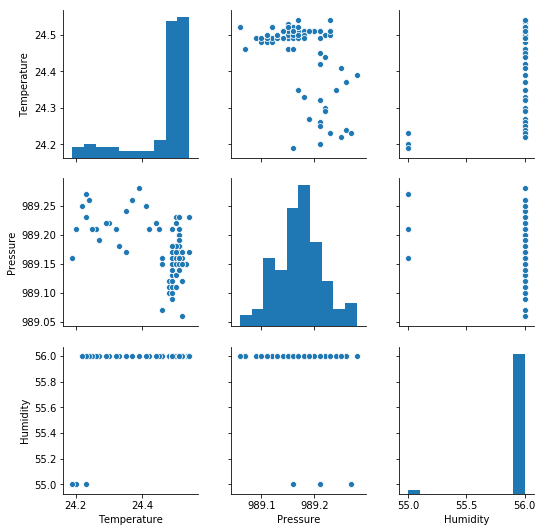

In [16]:
sns.pairplot(data)

In [17]:
gauss_distri=[]

for val in range(0,len(data)):    
    value=random.uniform(-1,1)
    gauss_distri.append(value)  


In [18]:
data['gauss']=gauss_distri


In [19]:
data['Wind_Load']=0.0001 * 2 * 0.00256 * (7.5314+data['gauss'])**2 
data['Wind_Pressure']=data['Wind_Load'].values / 0.0002
data['Wind_Speed']= ( data['Wind_Pressure'].values / 0.00256 )**0.5

In [20]:
data.head(10)

,Temperature,Pressure,Humidity,gauss,Wind_Load,Wind_Pressure,Wind_Speed
0,24.46,989.15,56,0.070780,0.000030,0.147950,7.602180
1,24.46,989.16,56,0.256940,0.000031,0.155285,7.788340
2,24.46,989.07,56,-0.636426,0.000024,0.121704,6.894974
3,24.48,989.10,56,0.446701,0.000033,0.162944,7.978101
4,24.48,989.11,56,-0.862480,0.000023,0.113855,6.668920
5,24.49,989.18,56,0.753128,0.000035,0.175702,8.284528
6,24.51,989.20,56,-0.811713,0.000023,0.115595,6.719687
7,24.49,989.11,56,0.530874,0.000033,0.166401,8.062274
8,24.49,989.11,56,-0.590909,0.000025,0.123316,6.940491
9,24.49,989.15,56,-0.440816,0.000026,0.128708,7.090584


In [21]:
del data['gauss']
data.head(10)

,Temperature,Pressure,Humidity,Wind_Load,Wind_Pressure,Wind_Speed
0,24.46,989.15,56,0.000030,0.147950,7.602180
1,24.46,989.16,56,0.000031,0.155285,7.788340
2,24.46,989.07,56,0.000024,0.121704,6.894974
3,24.48,989.10,56,0.000033,0.162944,7.978101
4,24.48,989.11,56,0.000023,0.113855,6.668920
5,24.49,989.18,56,0.000035,0.175702,8.284528
6,24.51,989.20,56,0.000023,0.115595,6.719687
7,24.49,989.11,56,0.000033,0.166401,8.062274
8,24.49,989.11,56,0.000025,0.123316,6.940491
9,24.49,989.15,56,0.000026,0.128708,7.090584


In [22]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Temperature,Pressure,Humidity,Wind_Load,Wind_Pressure,Wind_Speed
Temperature,1,-0.476296,0.513835,0.104413,0.104413,0.102244
Pressure,-0.476296,1,-0.171613,-0.0463983,-0.0463983,-0.0512583
Humidity,0.513835,-0.171613,1,0.13944,0.13944,0.137763
Wind_Load,0.104413,-0.0463983,0.13944,1,1,0.999456
Wind_Pressure,0.104413,-0.0463983,0.13944,1,1,0.999456
Wind_Speed,0.102244,-0.0512583,0.137763,0.999456,0.999456,1


In [23]:
data.corr()[['Temperature']].sort_values('Temperature')

,Temperature
Pressure,-0.476296
Wind_Speed,0.102244
Wind_Pressure,0.104413
Wind_Load,0.104413
Humidity,0.513835
Temperature,1.000000


In [24]:
x=data.iloc[:,1:]
y=data.iloc[:,0:1]

In [25]:
print(x)


Pressure  Humidity  Wind_Load  Wind_Pressure  Wind_Speed
0      989.15        56   0.000030       0.147950    7.602180
1      989.16        56   0.000031       0.155285    7.788340
2      989.07        56   0.000024       0.121704    6.894974
3      989.10        56   0.000033       0.162944    7.978101
4      989.11        56   0.000023       0.113855    6.668920
5      989.18        56   0.000035       0.175702    8.284528
6      989.20        56   0.000023       0.115595    6.719687
7      989.11        56   0.000033       0.166401    8.062274
8      989.11        56   0.000025       0.123316    6.940491
9      989.15        56   0.000026       0.128708    7.090584
10     989.11        56   0.000025       0.124430    6.971771
11     989.11        56   0.000026       0.131645    7.171044
12     989.13        56   0.000027       0.135544    7.276449
13     989.17        56   0.000031       0.155233    7.787040
14     989.11        56   0.000027       0.132771    7.201656
15     989.12

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
degree=4

model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
model.fit(x_train,y_train)
    
y_pred=model.predict(x_test)    

In [28]:
mean_absolute_error(y_test, y_pred)

0.05185667741866392

In [29]:
mean_squared_error(y_test, y_pred)

0.007323584177887275

In [30]:
model.score(x_test,y_pred)

1.0

In [31]:
y_pred.mean()

24.452537860189164

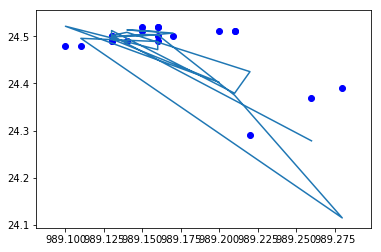

In [32]:
plt.scatter(x_test['Pressure'],y_test,color='blue')
plt.plot(x_test['Pressure'],y_pred)
    

In [33]:
print(mean_squared_error(y_test,y_pred) )
print( r2_score(y_test,y_pred) )
print( mean_absolute_error(y_test,y_pred) )

0.007323584177887275
-1.3029810485227347
0.05185667741866392


In [34]:
df=pd.read_csv('temp.csv')
df['Humidity'] = df['Humidity'].fillna((df['Humidity'].mean()))

In [35]:
gauss_distri=[]

for val in range(0,len(df)):    
    value=random.uniform(-1,1)
    gauss_distri.append(value)  

df['gauss']=gauss_distri
df['Wind_Load']=0.0001 * 2 * 0.00256 * (7.5314+df['gauss'])**2 
df['Wind_Pressure']=df['Wind_Load'].values / 0.0002
df['Wind_Speed']= ( df['Wind_Pressure'].values / 0.00256 )**0.5
del df['gauss']
del df['Temperature']
df.head(5)

,Pressure,Humidity,Wind_Load,Wind_Pressure,Wind_Speed
0,989.20,56.0,0.000024,0.119739,6.839070
1,989.20,56.0,0.000024,0.119414,6.829800
2,989.24,56.0,0.000034,0.169940,8.147572
3,989.21,56.0,0.000035,0.173185,8.224991
4,989.17,56.0,0.000027,0.135762,7.282312


In [36]:
print(model.predict(df).mean())

24.451619458198547


In [37]:
no_of_sample=len(data)

In [38]:
at=data.iloc[:,0].sum()/no_of_sample
ah=data.iloc[:,2].sum()/no_of_sample
ap=data.iloc[:,1].sum()/no_of_sample
aws=data['Wind_Speed'].sum()/no_of_sample


In [39]:
# make 2 3 ifs for temp and then nested 3 ifs for humidity 

In [40]:
print('Average Temperature =',at,'C')
print('Average Humidity =',ah,'%')
print('Average Air Pressure =',ap,'mm of Hg')
print('Average Wind Speed =',aws,'Km/hr')


print('---------------------------------------------------------------------------------------------------------------------')

print('                                           Weather Forecast : ')


if(at>35):
    if(ah>80):
        print('The weather will be hot and very humid')     
    elif(ah>50 and ah<80):
        print('The weather will be hot and humid ')
    elif(ah>20 and ah<50):
        print('The weather will be hot and somewhat humid')
    elif(ah>0 and ah<20):
        print('The weather will be hot and dry')
    else:
        print('ARID DROUGHT CONDITION')
        
elif(at>30 and at<35):
    if(ah>80):
        print('The weather will be warm and very humid')
    elif(ah>50 and ah<80):
        print('The weather will be warm and humid ')
    elif(ah>20 and ah<50):
        print('The weather will be warm and somewhat humid')
    elif(ah>0 and ah<20):
        print('The weather will be warm and dry')
    else:
        print('ARID DROUGHT CONDITION')
elif(at>20 and at<30):
    if(ah>80):
        print('The weather will be pleasantly normal and very humid')
    elif(ah>50 and ah<80):
        print('The weather will be pleasantly normal and humid ')
    elif(ah>20 and ah<50):
        print('The weather will be pleasantly normal and somewhat humid')
    elif(ah>0 and ah<20):
        print('The weather will be pleasantly normal and dry')
    else:
        print('ARID DROUGHT CONDITION')
elif(at>15 and at<20):
    if(ah>80):
        print('The weather will be cool and very humid')
    elif(ah>50 and ah<80):
        print('The weather will be cool and humid ')
    elif(ah>20 and ah<50):
        print('The weather will be cool and somewhat humid')
    elif(ah>0 and ah<20):
        print('The weather will be cool and dry')
    else:
        print('ARID DROUGHT CONDITION')
elif(at>10 and at<15):
    if(ah>80):
        print('The weather will be cold and very humid')
    elif(ah>50 and ah<80):
        print('The weather will be cold and humid ')
    elif(ah>20 and ah<50):
        print('The weather will be cold and somewhat humid')
    elif(ah>0 and ah<20):
        print('The weather will be cold and dry')
    else:
        print('ARID DROUGHT CONDITION')
elif(at>0 and at<10):
    if(ah>80):
        print('The weather will be freezing and very humid')
    elif(ah>50 and ah<80):
        print('The weather will be freezing and humid ')
    elif(ah>20 and ah<50):
        print('The weather will be freezing and somewhat humid')
    elif(ah>0 and ah<20):
        print('The weather will be freezing and dry')
    else:
        print('ARID DROUGHT CONDITION')
else:
    if(ah>80):
        print('The weather will be EXTREMELY FREEZING COLD and very humid')
    elif(ah>50 and ah<80):
        print('The weather will be EXTREMELY FREEZING COLD and humid ')
    elif(ah>20 and ah<50):
        print('The weather will be EXTREMELY FREEZING COLD and somewhat humid')
    elif(ah>0 and ah<20):
        print('The weather will be EXTREMELY FREEZING COLD and dry')
    else:
        print('ARID DROUGHT CONDITION')          
        
if(ap>700 and ap< 800):
    print(' and the sky will be clear as usual')
elif(ap>800):
    print('with Extremly visible sky')
elif(ap>0 and ap<300):
    print('with Stormy skies with possible hurricane')
elif(ap>300 and ap<700):
    print('with Turbid skies with mild disturbances')

        

Average Temperature = 24.462815533980574 C
Average Humidity = 55.970873786407765 %
Average Air Pressure = 989.1699029126215 mm of Hg
Average Wind Speed = 7.497075870740381 Km/hr
---------------------------------------------------------------------------------------------------------------------
                                           Weather Forecast : 
The weather will be pleasantly normal and humid 
with Extremly visible sky
